Youtube Tutorial: https://www.youtube.com/watch?v=jztwpsIzEGc
Github Repo: https://github.com/nicknochnack/ImageClassification

# **1 Install Dependencies and Setup**

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/main.py", line 69, in main
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/__init__.py", line 91, in create_command
    module = importlib.import_module(module_path)
  File "/usr/lib/python3.7/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 967, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 677, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/comman

In [ ]:
!pip list

Package                       Version
----------------------------- ------------------------------
absl-py                       1.2.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.4
Babel                         2.10.3
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.8
bokeh                         2.3.3
branca                        0.5.0
bs4                           0.0.1
CacheControl                  0.

In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
data_dir = 'data'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
os.listdir(data_dir)

['standard', 'not']

In [ ]:
rmdir /content/data/not/.ipynb_checkpoints

rmdir: failed to remove '/content/data/not/.ipynb_checkpoints': No such file or directory


In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
      print(image)

8_122636.jpg
4_122619.jpg
1_122609.jpg
10_122648.jpg
2_122611.jpg
3_122612.jpg
7_122634.jpg
9_122638.jpg
5_122621.jpg
6_122623.jpg
8_123440.jpg
8_123305.jpg
3_123351.jpg
6_123251.jpg
1_123237.jpg
4_123420.jpg
1_123348.jpg
2_123349.jpg
5_123250.jpg
4_123248.jpg
9_123442.jpg
5_123422.jpg
7_123303.jpg
10_123318.jpg
7_123437.jpg
10_123452.jpg
2_123239.jpg
6_123424.jpg
3_123241.jpg
9_123307.jpg


In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# **2 Load data**

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data', batch_size=3)

Found 30 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
#class 0 = not
#class 1 = standard
batch[1]

array([0, 0, 1], dtype=int32)

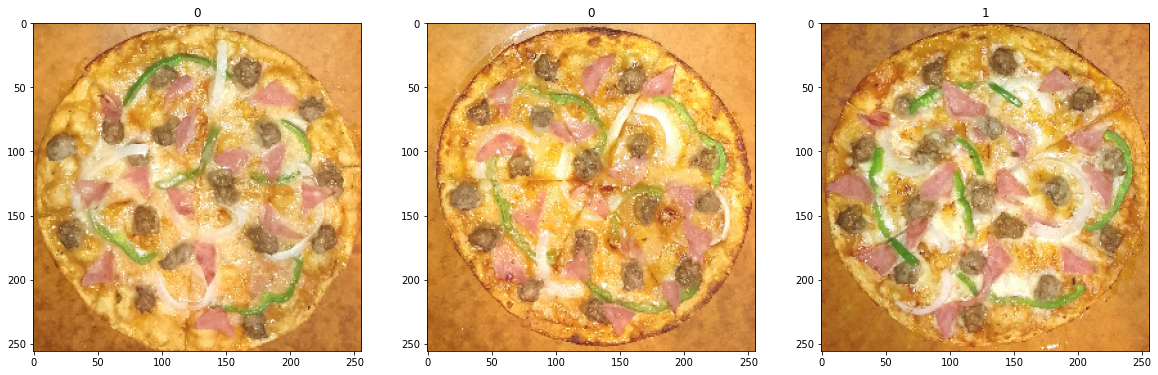

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# **3 Scale data**

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

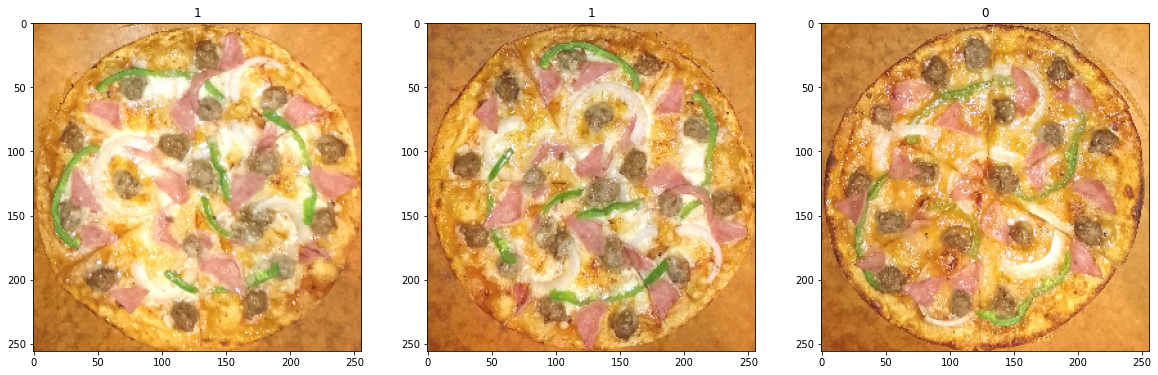

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data.as_numpy_iterator().next()[0].min()

0.00012718649

# **4 Split Data**

In [ ]:
len(data)

10

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
test_size

1

In [ ]:
train_size+val_size+test_size

10

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(test)

1

# **5 Build Deep Learning Model**


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# **6 Train**


In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 4s 394ms/step - loss: 0.7508 - accuracy: 0.6667 - val_loss: 0.5850 - val_accuracy: 0.6667
Epoch 2/20
7/7 [==============================] - 3s 358ms/step - loss: 0.6378 - accuracy: 0.7143 - val_loss: 0.6528 - val_accuracy: 0.6667
Epoch 3/20
7/7 [==============================] - 3s 341ms/step - loss: 0.5400 - accuracy: 0.7143 - val_loss: 0.3724 - val_accuracy: 0.8333
Epoch 4/20
7/7 [==============================] - 3s 349ms/step - loss: 0.3643 - accuracy: 1.0000 - val_loss: 0.1824 - val_accuracy: 1.0000
Epoch 5/20
7/7 [==============================] - 3s 356ms/step - loss: 0.3452 - accuracy: 0.8571 - val_loss: 0.3441 - val_accuracy: 0.8333
Epoch 6/20
7/7 [==============================] - 3s 363ms/step - loss: 0.3674 - accuracy: 0.8571 - val_loss: 0.3288 - val_accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 3s 362ms/step - loss: 0.4294 - accuracy: 0.8571 - val_loss: 0.2018 - val_accuracy: 1.0000
Epoch 8/20
7/7 [====

# **7 Plot Performance**


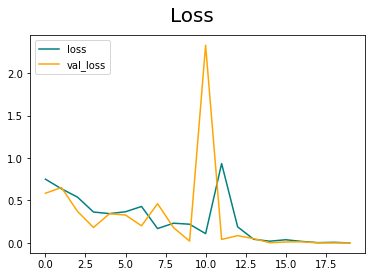

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

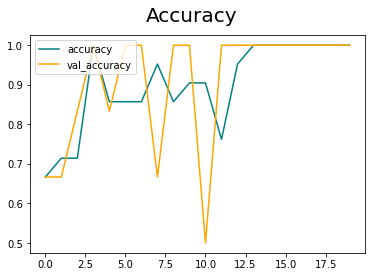

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# **8 Evaluate**


In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
len(test)

1

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


# **9 Test**


In [ ]:
import cv2

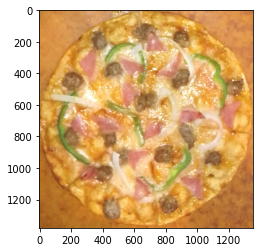

In [ ]:
img = cv2.imread('undertest2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

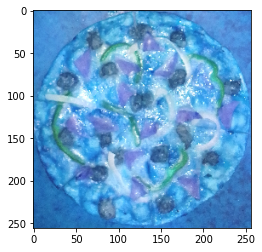

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

array([[0.14784262]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Standard')
else:
    print(f'Predicted class is Not the Standard')

Predicted class is Not the Standard


# **10 Save the Model**



In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','pizza_quality_classifier.h5'))

In [ ]:
new_model = load_model(os.path.join('models','pizza_quality_classifier.h5'))

In [ ]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
if yhatnew > 0.5: 
    print(f'Predicted class is Standard')
else:
    print(f'Predicted class is Not the Standard')

Predicted class is Not the Standard
